In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

rv1 = sp.stats.multivariate_normal([-1.5, -1.5], [[1, 0.5], [0.5, 1]])
rv2 = sp.stats.multivariate_normal([+5.5, +1.5], [[1, 0], [0, 1]])

# Soft Clustering

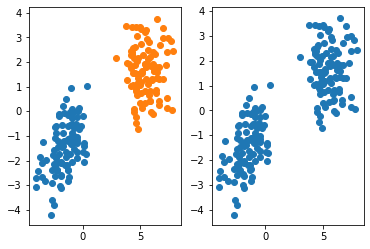

In [15]:
x1 = rv1.rvs(100, random_state=0)
x2 = rv2.rvs(100, random_state=0)
x = np.concatenate([x1,x2])
plt.subplot(1,2,1)
plt.scatter(x1[:,0], x1[:,1])
plt.scatter(x2[:,0], x2[:,1])

plt.subplot(1,2,2)
plt.scatter(x[:,0], x[:,1])

> Gaussian Mixture Model

In [16]:
# Step 1. 초기화

def initializer(x, num_cluster):
    p = np.array([1 for _ in range(num_cluster)]) / num_cluster
    mu_idx = np.random.choice(len(x), num_cluster)
    mu = []

    for idx in mu_idx:
        mu.append(x[idx])
    sigma = np.eye(len(x[1]))
    f = []
    for i in range(num_cluster):
        f.append(sp.stats.multivariate_normal(mu[i], sigma))
    
    return p, f

> 개체 j가 i번째 cluster에 속할 확률

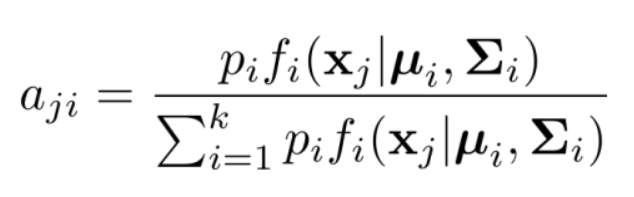

In [1]:
from IPython.display import Image
Image(filename='image_01.png',width=400, height=200)

In [17]:
# Step 2. 개체 j가 i번째 cluster에 속할 확률 a 구하기

def expectation(prob, fcn):
    a = np.zeros([len(x), k]).reshape(-1,k)

    for j in range(len(x)):
        for i in range(k):
            a[j][i] = prob[i] * fcn[i].pdf(x[j])
        
        a = a / a.sum(axis=1).reshape(-1,1)
    return a

> model parameter p, mu, sigma를 MLE로 estimate

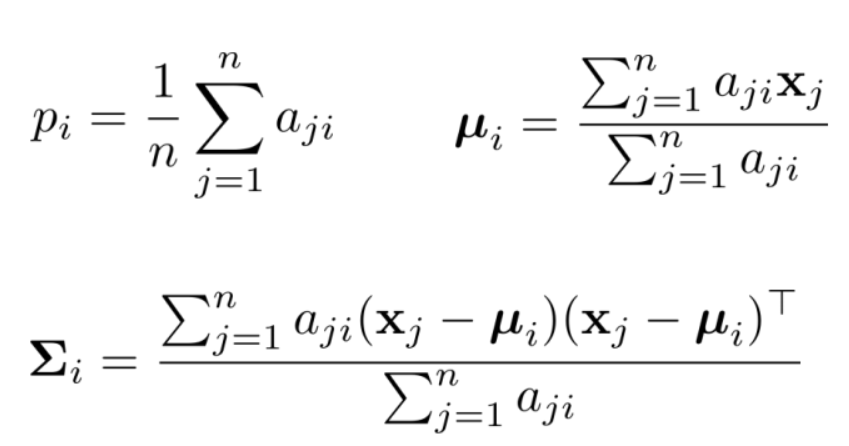

In [2]:
Image(filename='image_02.png',width=400, height=200)

In [18]:
# Step 3. Stem 2에서 계산된 a를 이용하여, 위와 같이 parameter들을 새롭게 계산한다.

def maximization(a_prob):
    new_p = a_prob.sum(axis=0)/len(x)

    new_mu = []

    for i in range(k):
        m = np.array([[0.0],[0.0]])
        for j in range(len(x)):
            m += (a_prob[j][i] * x[j]).reshape(-1,1)
        new_mu.append(m/a_prob[:,i].sum())
    new_sigma = []

    for i in range(k):
        sig = np.zeros([len(x[1]), len(x[1])])
        for j in range(len(x)):
            sig += a_prob[j][i] * (x[j].reshape(-1,1) - new_mu[i]) @ (x[j].reshape(-1,1) - new_mu[i]).reshape(-1,1).T
        new_sigma.append(sig/a_prob[:,i].sum())
    
    new_f = []

    for m, s in zip(new_mu, new_sigma):
        new_f.append(sp.stats.multivariate_normal(m.flatten(), s))
    
    return new_p, new_f

> 수렴 할 때까지 EM 동작을 반복 실행

In [19]:
k = 2

cnt = 0

p, f = initializer(x, k)
print(p)

while True:
    # 수렴 조건(likelihood fcn의 변화량이 미미할 때와 같은)
    if cnt == 10:
        break
    a = expectation(p,f)
    p,f = maximization(a)
    cnt += 1
    print(p)

[0.5 0.5]
[0.50062706 0.49937294]
[0.50000312 0.49999688]
[0.50000213 0.49999787]
[0.50000213 0.49999787]
[0.50000213 0.49999787]
[0.50000213 0.49999787]
[0.50000213 0.49999787]
[0.50000213 0.49999787]
[0.50000213 0.49999787]
[0.50000213 0.49999787]


C:\Users\SM129\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
